In [1]:
# Data Wrangling Library
import pandas as pd
import os
# Library for clustering
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Directory for path file
directory = "/Users/efishery/Documents/Statistics Coach/DPMPTSP/Database/dbt_playground/data/"
file_path = [os.path.join(directory, filename) for filename in os.listdir(directory) 
             if filename.endswith('.xlsx') and 'spatialjoin' in filename]

In [32]:
path_izin = "/Users/efishery/Documents/Statistics Coach/DPMPTSP/Database/dbt_playground/data/data_izin.xlsx"

dt_izin = pd.read_excel(path_izin)

In [3]:
# Adding empty list for inputting data from excel
dt = []

# Importing data investasi dan pengawasan
for i in range(0,len(file_path)) :
    dt_temp = pd.read_excel(file_path[i])
    dt.append(dt_temp)

dt_ip = pd.concat(dt, ignore_index = True)

In [4]:
dt_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089291 entries, 0 to 1089290
Data columns (total 29 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Index                            1089291 non-null  int64  
 1   Service_Point                    1089291 non-null  object 
 2   Tahun                            1089291 non-null  int64  
 3   Id_Proyek                        1089291 non-null  object 
 4   Uraian_Jenis_Proyek              1089291 non-null  object 
 5   Nib                              1089291 non-null  int64  
 6   Nama_Perusahaan                  1089235 non-null  object 
 7   Tanggal_Terbit_Oss               1089291 non-null  object 
 8   Uraian_Status_Penanaman_Modal    1089291 non-null  object 
 9   Uraian_Jenis_Perusahaan          1089237 non-null  object 
 10  Uraian_Risiko_Proyek             1089291 non-null  object 
 11  nama_proyek                      1048832 non-null 

In [5]:
# Transform data into crosstab
filtered_dt_ip = dt_ip[dt_ip['Kota'].isin(['Jakarta Selatan','Jakara Utara','Jakarta Barat','Jakarta Timur','Jakarta Pusat','Kepulauan Seribu'])]

ct_uspm = pd.crosstab(
    [filtered_dt_ip['Kota'], filtered_dt_ip['Kecamatan'], filtered_dt_ip['Kelurahan']]
    , filtered_dt_ip['Uraian_Status_Penanaman_Modal']
)

ct_ujp = pd.crosstab(
    [filtered_dt_ip['Kota'], filtered_dt_ip['Kecamatan'], filtered_dt_ip['Kelurahan']]
    , filtered_dt_ip['Uraian_Jenis_Perusahaan']
)

ct_urp = pd.crosstab(
    [filtered_dt_ip['Kota'], filtered_dt_ip['Kecamatan'], filtered_dt_ip['Kelurahan']]
    , filtered_dt_ip['Uraian_Risiko_Proyek']
)

ct_usu = pd.crosstab(
    [filtered_dt_ip['Kota'], filtered_dt_ip['Kecamatan'], filtered_dt_ip['Kelurahan']]
    , filtered_dt_ip['Uraian_Skala_Usaha']
)

ct_ji = filtered_dt_ip.groupby(['Kota','Kecamatan','Kelurahan'])['Jumlah_Investasi'].sum()

In [38]:
ct_izin = pd.crosstab(
    [dt_izin['service_point']]
    , dt_izin['Bidang_Recode']
)
# dt_izin.info()

In [6]:
combined_ct = pd.concat([ct_uspm, ct_usu, ct_ujp, ct_urp, ct_ji], axis=1).reset_index().fillna(method='ffill')

/var/folders/qj/vt4rcyh91s35vhsqftj_6fhh0000gn/T/ipykernel_1391/3598318314.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_ct = pd.concat([ct_uspm, ct_usu, ct_ujp, ct_urp, ct_ji], axis=1).reset_index().fillna(method='ffill')


In [44]:
inertia = []
K = range(1, 10)
for k in K : 
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(ct_izin)
    inertia.append(kmeans.inertia_)

# ct_izin.info()

# inertia = []
# K = range(1, 10)
# for k in K : 
#     kmeans = KMeans(n_clusters = k, random_state=42)
#     kmeans.fit(cleaned_ct)
#     inertia.append(kmeans.inertia_)

# one_hot = pd.get_dummies(cleaned_ct['Kelurahan'], prefix = 'Kelurahan')
# cleaned_ct = combined_ct.drop(['Kota','Kecamatan','Kelurahan'], axis = 1)

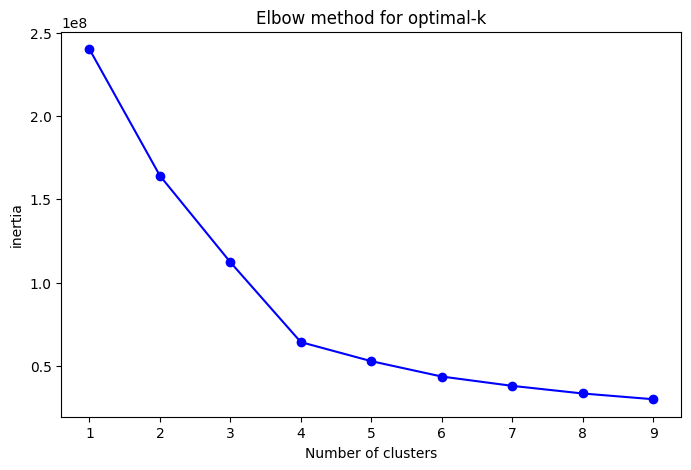

In [45]:
plt.figure(figsize = (8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.title('Elbow method for optimal-k')
plt.show()

In [47]:
optimal_k = 7

kmeans = KMeans(n_clusters = optimal_k, random_state=42)
ct_izin['Cluster'] = kmeans.fit_predict(ct_izin)

<Axes: xlabel='service_point', ylabel='Cluster'>

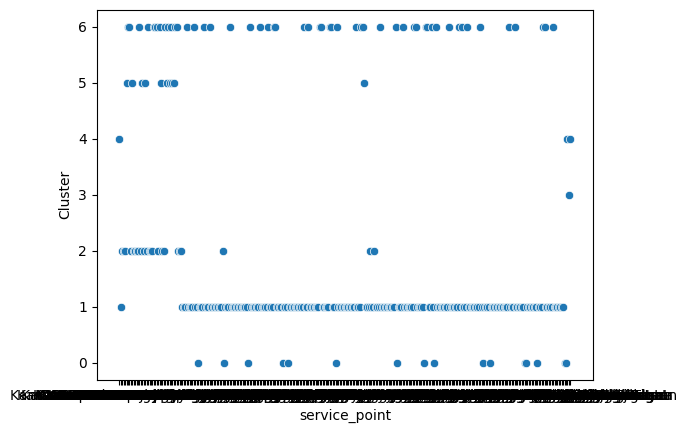

In [49]:
sns.scatterplot(x = ct_izin.index, y = ct_izin['Cluster'])